In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('webtraffic.csv')

In [3]:
data

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737
...,...,...
4891,4891,2555880561
4892,4892,2454084459
4893,4893,2405182410
4894,4894,2356280361


The first column is the hours as in this is the first hours, this is the second hour and so on.

And the second column session is the volume of traffic at an hourly level.

# Data Exploration for Web Traffic Forecasting

In [4]:
import matplotlib.pyplot as plt

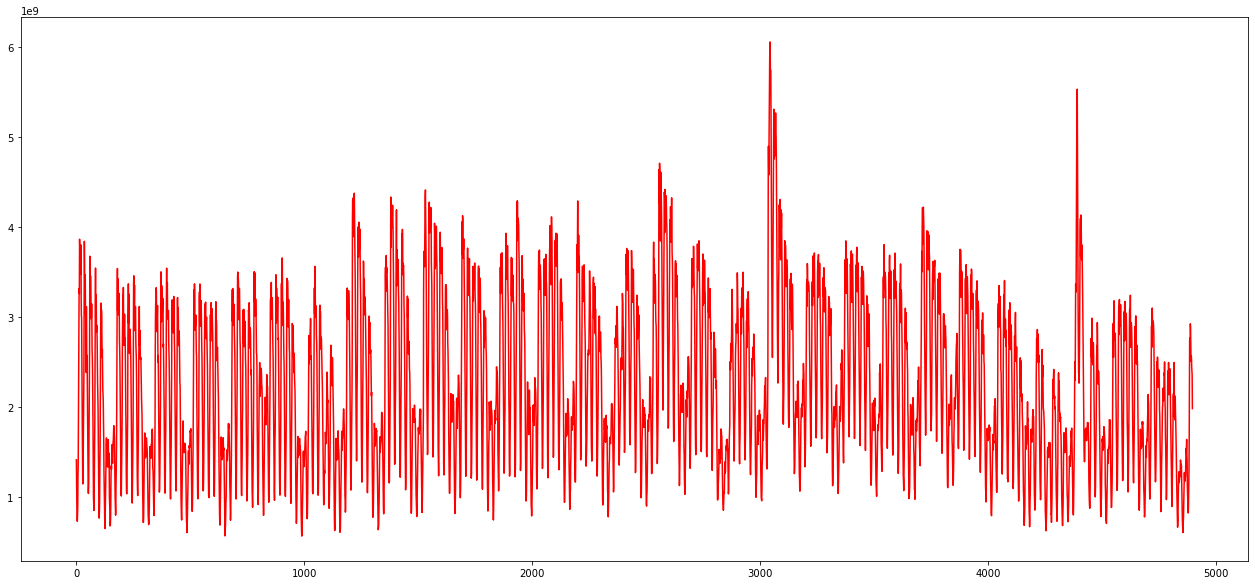

In [5]:
sessions = data['Sessions'].values

plt.figure(figsize=(22,10))
plt.plot(sessions,'r')
plt.show()

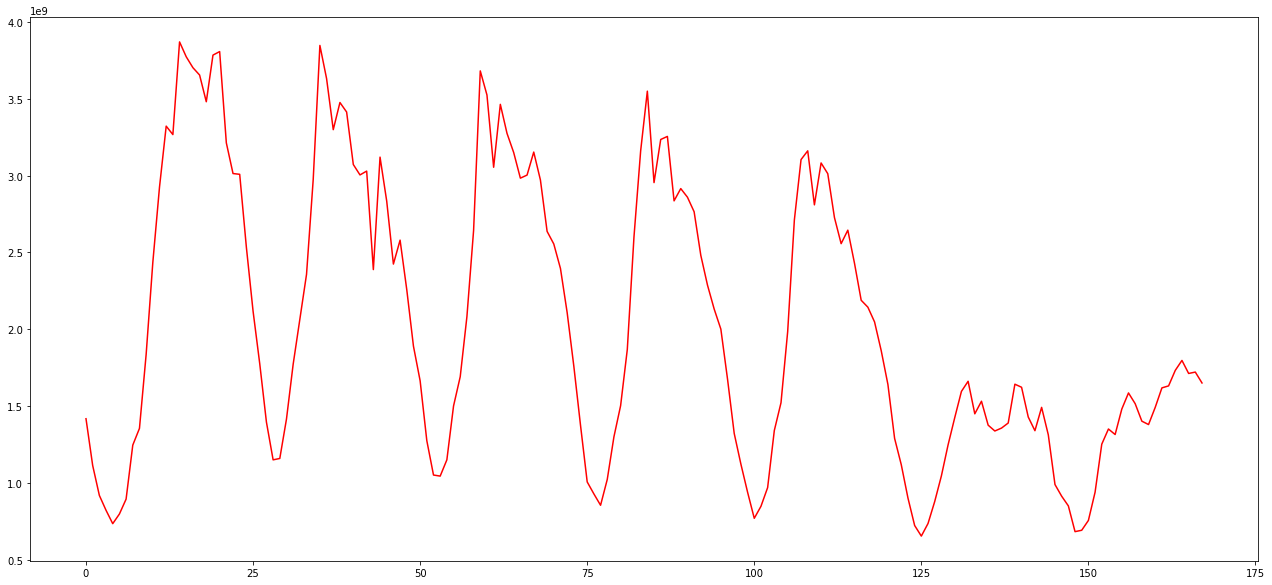

In [6]:
#first week web traffic

sample = sessions[:168]

plt.figure(figsize=(22,10))
plt.plot(sample,'r')
plt.show()

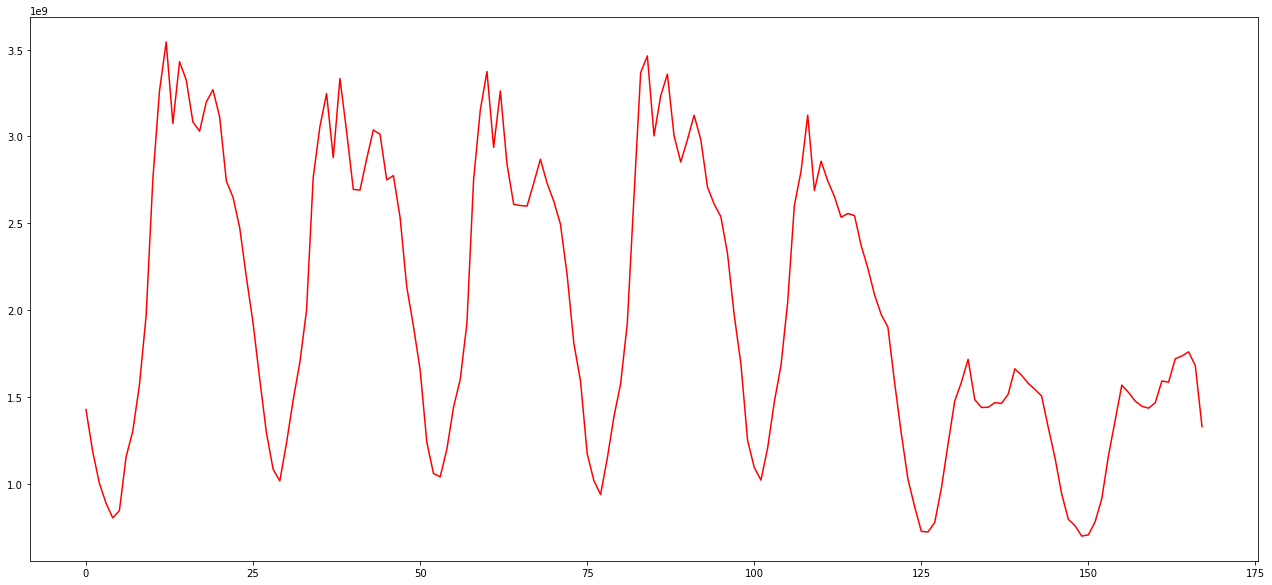

In [7]:
# 2nd week

sample = sessions[168:336]

plt.figure(figsize=(22,10))
plt.plot(sample,'r')
plt.show()

In [8]:
def prepare_data(seq,num):
    
    x=[]
    y=[]
    
    for i in range(0,(len(seq)-num)):
        input_ = seq[i:i+num]
        output  = seq[i+num]
        
        x.append(input_)
        y.append(output)
    
    return np.array(x), np.array(y)

In [9]:
num=168

x,y= prepare_data(sessions,num)

In [10]:
x[1]

array([1113769116,  919158921,  822352824,  735526737,  798400800,
        895206897, 1246503249, 1355285358, 1836321840, 2435122440,
       2925140931, 3321347328, 3266457273, 3869249877, 3772443780,
       3701585709, 3653681661, 3480029487, 3783421791, 3806375814,
       3212565219, 3012965019, 3007975014, 2532926538, 2117758122,
       1775443779, 1396203399, 1150695153, 1159677162, 1416163419,
       1772449776, 2063866068, 2357278362, 2974042980, 3846295854,
       3630727638, 3298393305, 3475039482, 3413163420, 3071847078,
       3003983010, 3028933035, 2388216393, 3119751126, 2833324839,
       2424144429, 2579832585, 2257478262, 1890213894, 1664665668,
       1275445278, 1051893054, 1044907047, 1150695153, 1500993504,
       1691611695, 2081830086, 2642706648, 3680627688, 3523941531,
       3053883060, 3463063470, 3274441281, 3149691156, 2983024989,
       3002985009, 3152685159, 2971048977, 2636718642, 2554882560,
       2395202400, 2108776113, 1759475763, 1375245378, 1006983

In [11]:
len(x[1])

168

In [12]:
y

array([1427141430, 1185625188, 1002991005, ..., 2405182410, 2356280361,
       1987019991], dtype=int64)

In [13]:
x

array([[1418159421, 1113769116,  919158921, ..., 1712569716, 1721551725,
        1650693654],
       [1113769116,  919158921,  822352824, ..., 1721551725, 1650693654,
        1427141430],
       [ 919158921,  822352824,  735526737, ..., 1650693654, 1427141430,
        1185625188],
       ...,
       [2888214894, 2803384809, 2464064469, ..., 2569852575, 2555880561,
        2454084459],
       [2803384809, 2464064469, 2228536233, ..., 2555880561, 2454084459,
        2405182410],
       [2464064469, 2228536233, 1957079961, ..., 2454084459, 2405182410,
        2356280361]], dtype=int64)

In [14]:
x_df = pd.DataFrame(x)
x_df

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1418159421,1113769116,919158921,822352824,735526737,798400800,895206897,1246503249,1355285358,1836321840,...,1402191405,1380235383,1492011495,1618757622,1631731635,1732529736,1797399801,1712569716,1721551725,1650693654
1,1113769116,919158921,822352824,735526737,798400800,895206897,1246503249,1355285358,1836321840,2435122440,...,1380235383,1492011495,1618757622,1631731635,1732529736,1797399801,1712569716,1721551725,1650693654,1427141430
2,919158921,822352824,735526737,798400800,895206897,1246503249,1355285358,1836321840,2435122440,2925140931,...,1492011495,1618757622,1631731635,1732529736,1797399801,1712569716,1721551725,1650693654,1427141430,1185625188
3,822352824,735526737,798400800,895206897,1246503249,1355285358,1836321840,2435122440,2925140931,3321347328,...,1618757622,1631731635,1732529736,1797399801,1712569716,1721551725,1650693654,1427141430,1185625188,1002991005
4,735526737,798400800,895206897,1246503249,1355285358,1836321840,2435122440,2925140931,3321347328,3266457273,...,1631731635,1732529736,1797399801,1712569716,1721551725,1650693654,1427141430,1185625188,1002991005,888220890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,2961068967,2938114944,2888214894,2803384809,2464064469,2228536233,1957079961,1772449776,1515963519,1256483259,...,1592809596,2255482260,2752486758,2772446778,2514962520,2929132935,2889212895,2659672665,2534922540,2569852575
4724,2938114944,2888214894,2803384809,2464064469,2228536233,1957079961,1772449776,1515963519,1256483259,1173649176,...,2255482260,2752486758,2772446778,2514962520,2929132935,2889212895,2659672665,2534922540,2569852575,2555880561
4725,2888214894,2803384809,2464064469,2228536233,1957079961,1772449776,1515963519,1256483259,1173649176,1204587207,...,2752486758,2772446778,2514962520,2929132935,2889212895,2659672665,2534922540,2569852575,2555880561,2454084459
4726,2803384809,2464064469,2228536233,1957079961,1772449776,1515963519,1256483259,1173649176,1204587207,1324347327,...,2772446778,2514962520,2929132935,2889212895,2659672665,2534922540,2569852575,2555880561,2454084459,2405182410


In [15]:
y_df = pd.DataFrame(y)
y_df

,0
0,1427141430
1,1185625188
2,1002991005
3,888220890
4,803390805
...,...
4723,2555880561
4724,2454084459
4725,2405182410
4726,2356280361


 We are not splitting the data randomly, we are splitting it in a sequential manner in the ratio, 90 is to 10.

In [16]:
ind = int(0.9 * len(x))

x_tr = x_df.iloc[:ind]
y_tr = y_df.iloc[:ind]

x_val=x_df.iloc[ind:]
y_val=y_df.iloc[ind:]

In [17]:
from sklearn.preprocessing import StandardScaler

#normalize the inputs

x_scaler= StandardScaler()
x_tr = x_scaler.fit_transform(x_tr)
x_val= x_scaler.transform(x_val)


#normalize the output

y_scaler=StandardScaler()
y_tr = y_scaler.fit_transform(y_tr)
y_val = y_scaler.transform(y_val)

After that, we are reshaping the data from two dimensional to 3 dimensional.

In [18]:
#reshaping input data

x_tr= x_tr.reshape(x_tr.shape[0],x_tr.shape[1],1)
x_val= x_val.reshape(x_val.shape[0],x_val.shape[1],1)
print(x_tr.shape)

(4255, 168, 1)


The first dimension of our data is the number of sequences, and the second dimension is the number of elements in the sequences.

# Model Building for Web Traffic Forecasting

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [20]:
model =  Sequential()
model.add(LSTM(128,input_shape=(168,1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [21]:
model.compile(loss='mse',optimizer='adam')

# Train the model for 30 epochs with batch size of 16:
history=model.fit(x_tr, y_tr ,epochs=30, batch_size=16, 
           validation_data=(x_val,y_val))

Epoch 1/30
266/266 [==============================] - 33s 116ms/step - loss: 0.1135 - val_loss: 0.0354
Epoch 2/30
266/266 [==============================] - 30s 114ms/step - loss: 0.0405 - val_loss: 0.0318
Epoch 3/30
266/266 [==============================] - 30s 115ms/step - loss: 0.0349 - val_loss: 0.0247
Epoch 4/30
266/266 [==============================] - 30s 114ms/step - loss: 0.0334 - val_loss: 0.0277
Epoch 5/30
266/266 [==============================] - 30s 114ms/step - loss: 0.0300 - val_loss: 0.0253
Epoch 6/30
266/266 [==============================] - 30s 115ms/step - loss: 0.0286 - val_loss: 0.0247
Epoch 7/30
266/266 [==============================] - 30s 114ms/step - loss: 0.0280 - val_loss: 0.0272
Epoch 8/30
266/266 [==============================] - 30s 114ms/step - loss: 0.0244 - val_loss: 0.0195
Epoch 9/30
266/266 [==============================] - 30s 115ms/step - loss: 0.0231 - val_loss: 0.0188
Epoch 10/30
266/266 [==============================] - 30s 114ms/step - l

In [22]:
mse = model.evaluate(x_val,y_val)
print("Mean Square Error:",mse)

15/15 [==============================] - 1s 51ms/step - loss: 0.0169
Mean Square Error: 0.01691504195332527


Now moving on to forecasting. These are the steps that we will follow:-

first, initialize an array with weeks data,

Predict the next hour traffic volume

Append the predicted value at the end of the array ‘data

Skip the first element of the array ‘data’

Repeating steps, from the second step till the fourth step for the specified number of iterations.

In [23]:
x_val[0]

array([[-1.67748416],
       [-1.50356608],
       [-1.32346531],
       [-1.15240907],
       [-1.02977559],
       [-0.85671808],
       [-0.94495707],
       [-0.82336085],
       [-0.93993505],
       [-0.8927536 ],
       [-0.94862509],
       [-0.77365564],
       [-0.76671259],
       [-0.8036709 ],
       [-0.80327823],
       [-0.85783548],
       [-0.7695327 ],
       [-0.92632322],
       [-1.25129087],
       [-1.45957539],
       [-1.64033498],
       [-1.63737181],
       [-1.73865087],
       [-1.60680407],
       [-1.47513874],
       [-1.19649229],
       [-0.80183153],
       [-0.51075383],
       [-0.022216  ],
       [ 0.01153796],
       [-0.13706917],
       [ 0.05389679],
       [ 0.13395932],
       [-0.0990726 ],
       [-0.20671445],
       [-0.22408552],
       [-0.19183093],
       [-0.34651533],
       [-0.32532711],
       [-0.42509009],
       [-0.70196595],
       [-0.86772339],
       [-1.14342239],
       [-1.37055898],
       [-1.48537892],
       [-1

In [24]:
model.predict(x_val[0].reshape(1,-1,1))

array([[-0.7574904]], dtype=float32)

In [25]:
model.predict(x_val[0].reshape(1,-1,1))[0][0]

-0.7574904

In [26]:
def forecast(x_val, no_of_pred):
    
    predictions=[]
  #intialize the array with a weeks data
    temp=x_val[0]
    
    for i in range(no_of_pred):
        #predict for the next hour 
        pred=model.predict(temp.reshape(1,-1,1))[0][0]
    
    #append the prediction as the last element of array
        temp = np.insert(temp,len(temp),pred)
        predictions.append(pred)
    #ignore the first element of array
        temp = temp[1:]
    
    return predictions

In [33]:
# for next 14 days

no_of_pred = 24*14

y_pred= forecast(x_val,no_of_pred)
y_true = y_val[0:(no_of_pred)]
# Lets convert back the normalized values to the original dimensional space
y_true= y_scaler.inverse_transform(y_true)
y_pred= y_scaler.inverse_transform(y_pred)

In [34]:
def plot(y_true,y_pred):
    ar = np.arange(len(y_true))
    plt.figure(figsize=(22,10))
    plt.plot(ar, y_true,'r')
    plt.plot(ar, y_pred,'y')
    plt.show()

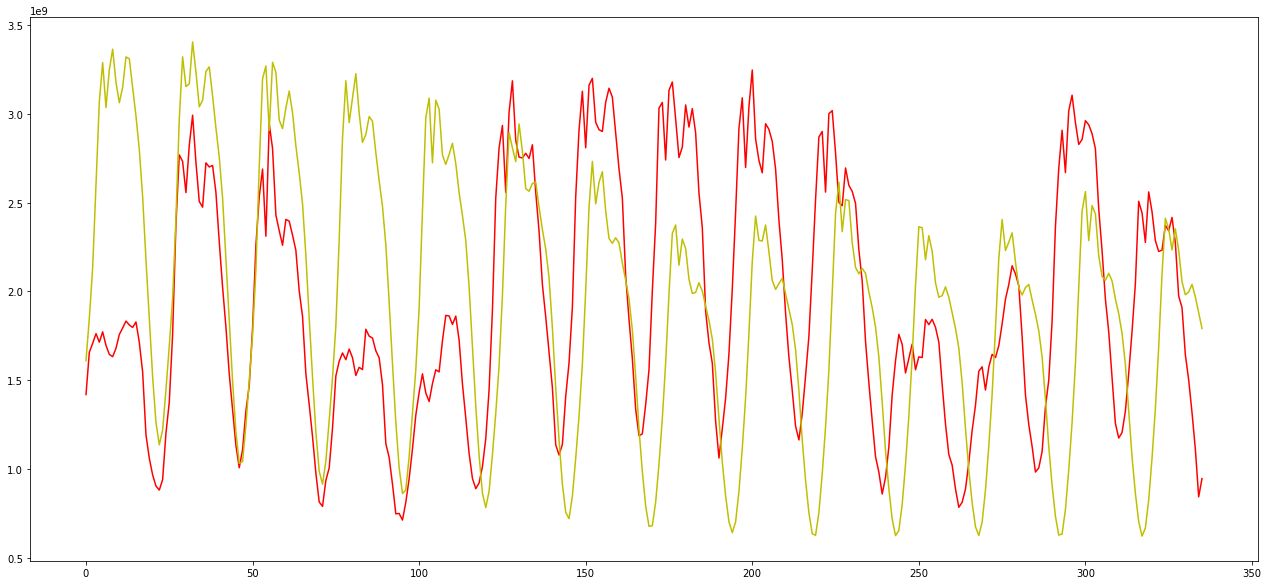

In [35]:
plot(y_true,y_pred)